In [12]:
# all the imports

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv('Student_data.csv')
df.head()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,9,1,91.0
1,4,82,4,2,65.0
2,8,51,7,2,45.0
3,5,52,5,2,36.0
4,7,75,8,5,66.0


In [10]:
df.shape

(10000, 5)

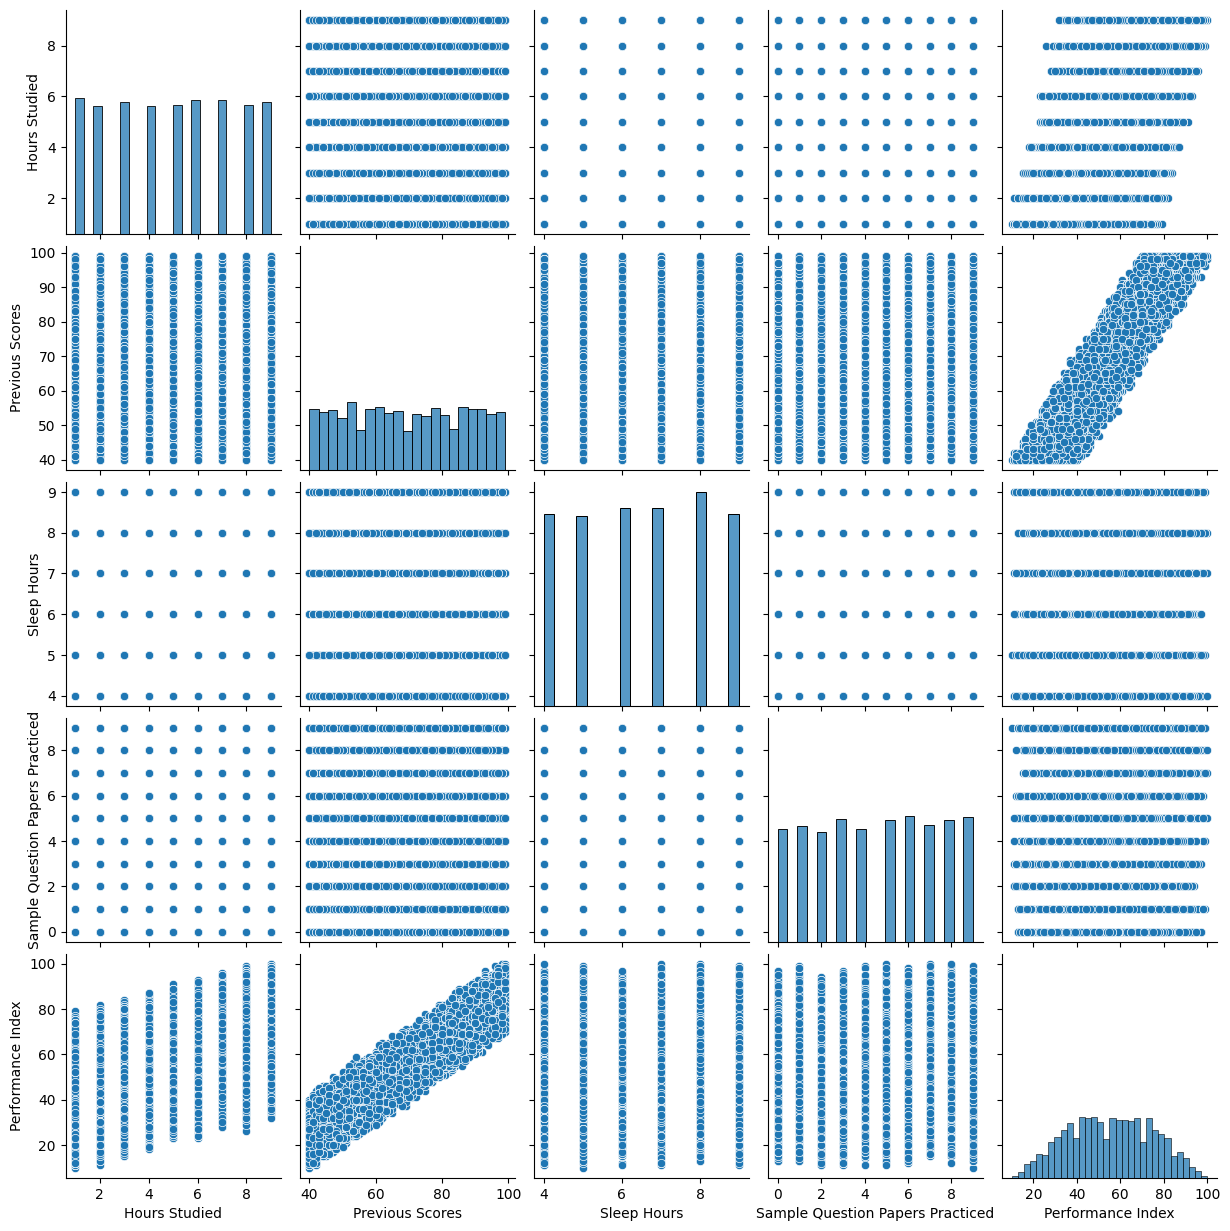

In [3]:
sns.pairplot(df)

<Axes: >

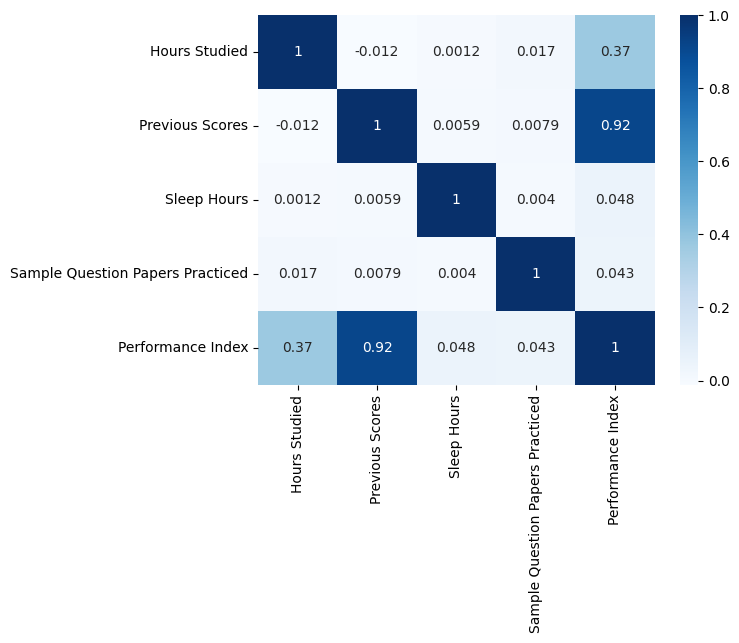

In [24]:
sns.heatmap(df.corr(), annot= True, cmap = 'Blues')

<Axes: xlabel='Performance Index', ylabel='Density'>

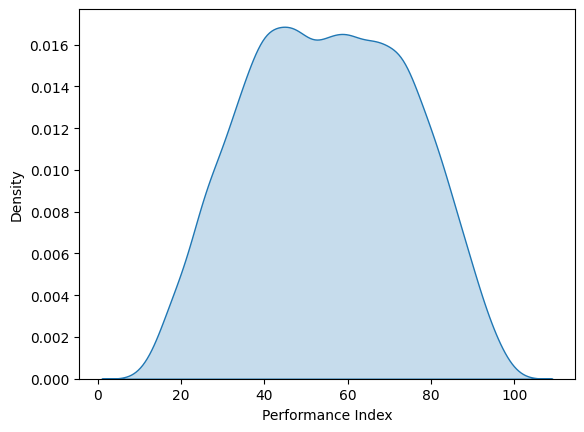

In [5]:
sns.kdeplot(df, x = 'Performance Index',fill=True)

<Axes: ylabel='Performance Index'>

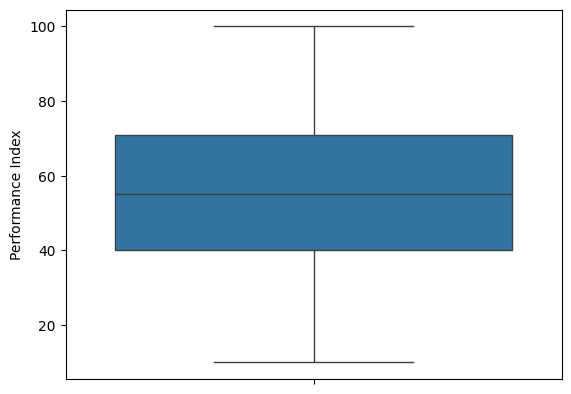

In [6]:
sns.boxplot(df['Performance Index'])

In [7]:
df.columns.tolist()

['Hours Studied',
 'Previous Scores',
 'Sleep Hours',
 'Sample Question Papers Practiced',
 'Performance Index']

In [9]:
X = df.drop(df.columns[-1], axis= 1)
y = df[df.columns[-1]]

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y,train_size=0.7, random_state=101)

In [14]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [15]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

In [16]:
y_pred = model.predict(X_test_scaled)

In [17]:
print(f"""
coefficients: {model.coef_}
intercept: {model.intercept_}
RMSE: {np.sqrt(mean_squared_error(y_test, y_pred))}
R2: {r2_score(y_test, y_pred)}
""")


coefficients: [ 7.39905678 17.72140965  0.83715087  0.55276954]
intercept: 55.298857142857145
RMSE: 2.0406203642110565
R2: 0.9885277194859181



In [18]:
statistic, p_value = stats.shapiro(residuals)
print(f'stadistico: {statistic}')
print(f'p value: {p_value}')

alpha = 0.05
if p_value <= alpha:
    print('Rechazamos la hipotesis nula, los datos no siguen una distribución normal') 
else:
    print('Fallamos en rechazar la hipotesis nula. Los datos podrían seguir una distribción normal')residuals = y_test - model.predict(X_test_scaled)
residuals = residuals.values

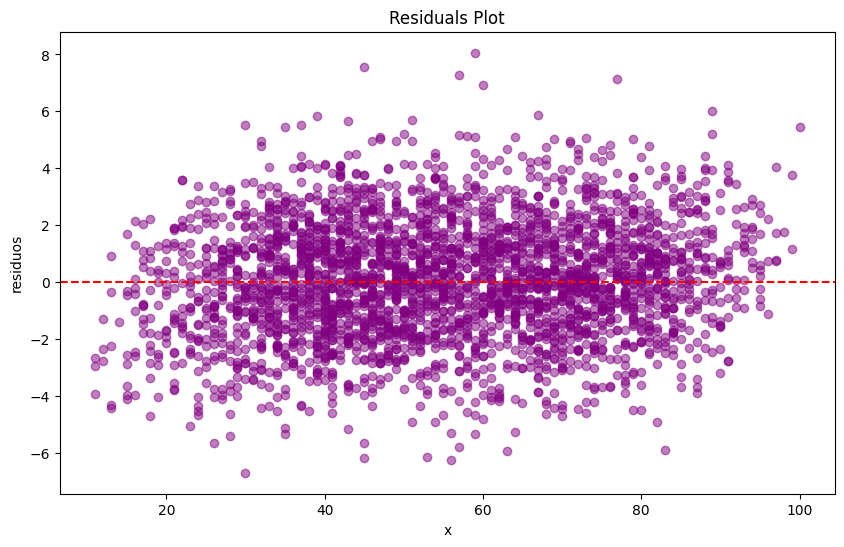

In [19]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, residuals, color = 'purple', alpha = 0.5)
plt.axhline(y = 0, color = 'red', linestyle ='--')
plt.title('Residuals Plot')
plt.xlabel('x')
plt.ylabel('residuos')
plt.show()

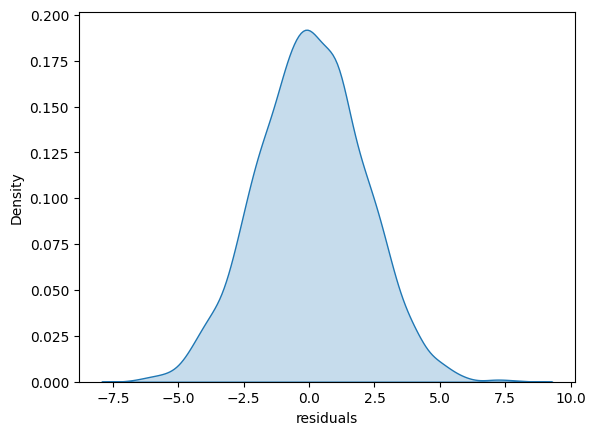

In [20]:
res_df = pd.DataFrame({'residuals':residuals})
sns.kdeplot(res_df, x = 'residuals', fill=True)
plt.show()

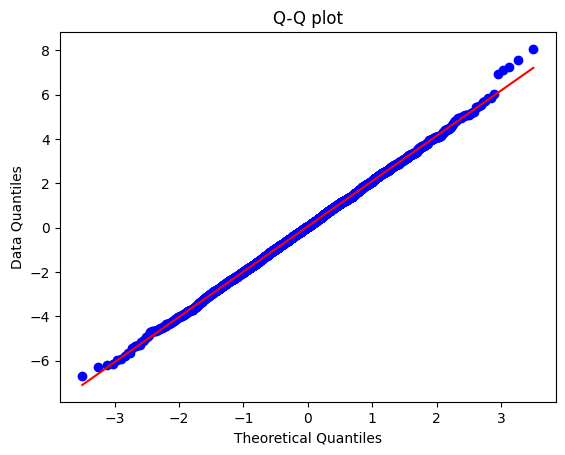

In [21]:
(osm, osr), (slope, intercept, r) = stats.probplot(residuals, dist='norm', plot = plt)
plt.title('Q-Q plot')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Data Quantiles')
plt.show()

In [22]:
statistic, p_value = stats.shapiro(residuals)
print(f'stadistico: {statistic}')
print(f'p value: {p_value}')

alpha = 0.05
if p_value <= alpha:
    print('Rechazamos la hipotesis nula, los datos no siguen una distribución normal') 
else:
    print('Fallamos en rechazar la hipotesis nula. Los datos podrían seguir una distribción normal')

stadistico: 0.9995405720841611
p value: 0.7317230149142624
Fallamos en rechazar la hipotesis nula. Los datos podrían seguir una distribción normal
